# Clustering

In [16]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# helper modules
exec(open('helper_functions.py').read())

# load our previously processed well data
unscaled_well_data = pd.read_csv('../data/unscaled_well_data.csv')
scaled_well_data = pd.read_csv('../data/scaled_well_data.csv')

## K-Means Clustering

The first clustering method we attack is common. It is a partitional (also known as 'hard') clustering method. We will use k-means, which is the most common clustering method. The recipe for k-means includes:

1. Compute a distance matrix
2. Specify k-clusters
3. Compute the centroid randomly
4. Cluster based on this centroid and k-clusters, re-compute, and repeat until stable
5. Hypertune for k

A potential use case related to this data is the generation of type curves. Say we wanted to find three, or five, or ten type curve areas in a producing area but wanted numerous factors to weigh in (not just spatial location). We could use a clustering algorithm to decide which wells belong to which type-curve area.

<img src="../images/kmeans_illustration.png" alt="Illustration of DBSCAN" style="width: 800px;"  align="left"/>


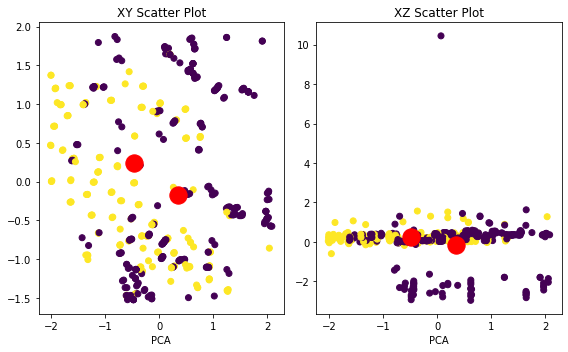

Inertia: 11340.775735996307
Calinski Harabaz: 97.27689090792327
Silhouette: 0.1772138645951243


In [7]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(scaled_well_data)
plot_cluster_results(kmeans, scaled_well_data)
print_clustering_scores(scaled_well_data, kmeans)

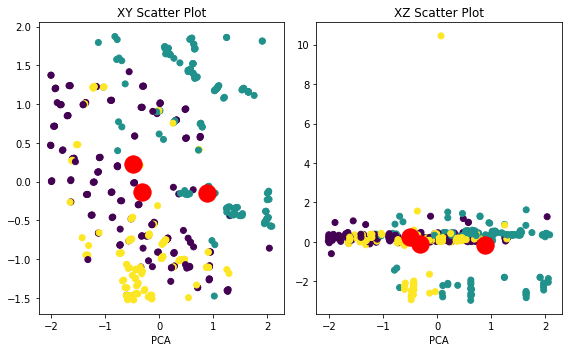

Inertia: 10019.372044420848
Calinski Harabaz: 85.86299138999975
Silhouette: 0.19678643705070217


In [8]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_well_data)
plot_cluster_results(kmeans, scaled_well_data)
print_clustering_scores(scaled_well_data, kmeans)

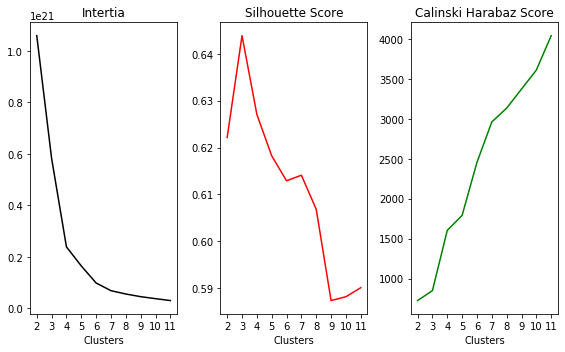

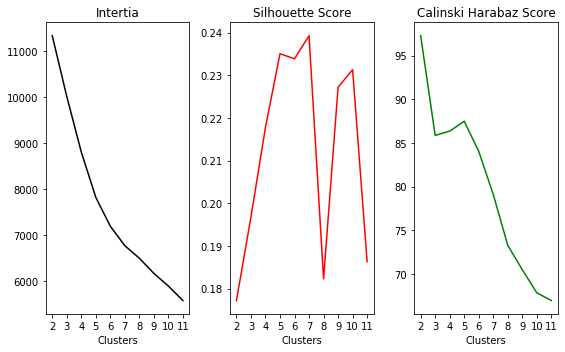

In [9]:
kmeans_elbowplot(unscaled_well_data)
kmeans_elbowplot(scaled_well_data)

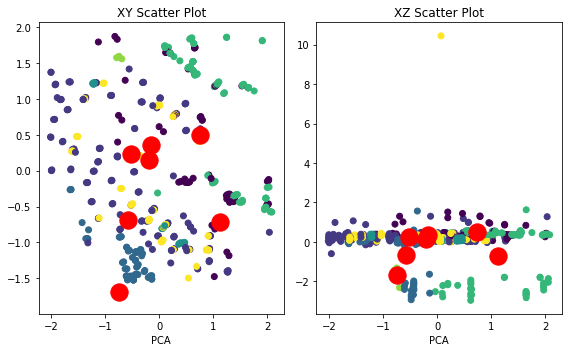

Inertia: 6773.570478592387
Calinski Harabaz: 79.11164275955812
Silhouette: 0.2392960065060659


In [10]:
kmeans_3plus = KMeans(n_clusters=7, init='k-means++', max_iter=300, 
                n_init=10, random_state=0).fit(scaled_well_data)
plot_cluster_results(kmeans_3plus, scaled_well_data)
print_clustering_scores(scaled_well_data, kmeans_3plus)

## Density-Based Clustering

Now we look at another type of clustering to see how the sklearn framework is relatively consistent and convienient for doing unsupervised learning. Here is the recipe for density-based spatial clustering applications with noise (DBSCAN). Don't ask me about why the 'applications', it's clearly a backwardnym.

1. Specify a minimum number of core points
2. Specify a density parameter for local neighbourhood reachability
3. Expand clusters based on reachability and identify noise clusters that can't be reached
4. Hypertune the density parameters using a kNN elbow method similar to that shown above

<img src="../images/dbscan_explanation.png" alt="Illustration of DBSCAN" style="width: 800px;"  align="left"/>

/home/chuao/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


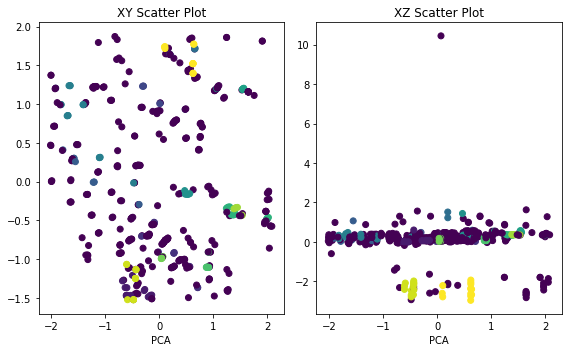

Calinski Harabaz: 8.038091691561828
Silhouette: -0.1859681147478011


In [17]:
db = DBSCAN(eps=2, min_samples=5).fit(scaled_well_data)

def calculate_centres(db):
    labels = np.unique(db.labels_)
    array_list = []

    for label in labels:
        label_indices = np.where(db.labels_ == label)
        array_list.append(np.array(scaled_well_data.ix[label_indices].mean()))

    np.array(array_list)
    
db.cluster_centers_ = calculate_centres(db)
plot_cluster_results(db, scaled_well_data)
print_clustering_scores(scaled_well_data, db)

## Hierarchichal Clustering

Now we dive into a different type of clustering, but one that I find really interesting - hierarchical methods. Here is the general recipe for hierarchical clustering:

1. Every cluster starts alone
2. Two clusters find eachother and become close friends
3. This friend network grows until all points are connected again
4. We come along like a bad meme and 'cut the tree' to identify k clusters

In the examples below, I have hacked some code to make a dendrogram - which is a tree diagram to show how observations interact to form a complete network. Take close note how the different methods affect clustering performance.

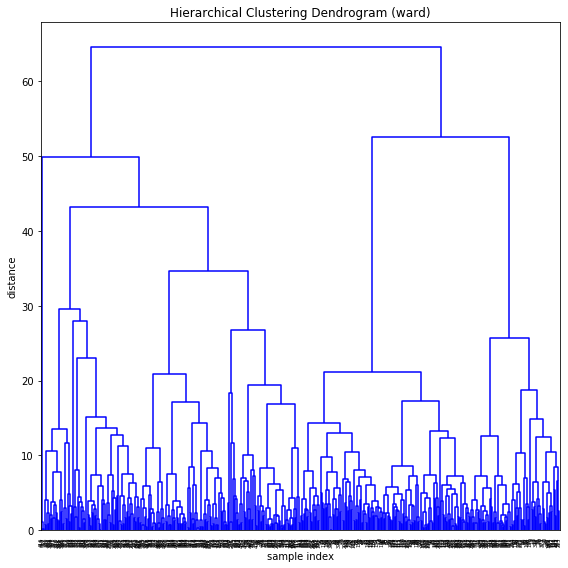

In [18]:
# "ward" minimizes the variance of the clusters being merged.
ward_hclust = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(scaled_well_data)
plot_dendrogram(scaled_well_data, method = 'ward')

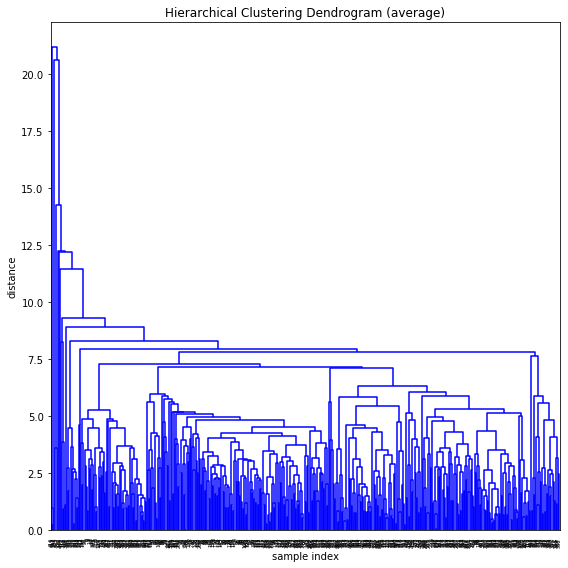

In [19]:
# "average" uses the average of the distances of each observation of the two sets.
avg_hclust = AgglomerativeClustering(n_clusters=3, linkage='average').fit(scaled_well_data)
plot_dendrogram(scaled_well_data, method = 'average')

In [ ]:
# "complete" or maximum linkage uses the maximum distances between all observations.
comp_hclust = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(scaled_well_data)
plot_dendrogram(scaled_well_data, method = 'complete')

## Acknowledgments

This presentation wouldn't have been possible without all the support I've received from the following organizations
<img src="../images/untapped_sponsors.jpg" alt="My amazing sponsors" style="width: 400px;"  align="left"/>